### IMDB Analysis with Machine Learning Models

#### Not only does a commercial success film entertain the audience, it also allows film companies to make huge profits. Many factors are significant for making good movies, such as good directors, experienced actors. Nevertheless, popular directors and actors can still carry the anticipated revenue from the box office but can not guarantee a highly rated imdb ranking.
#### This dataset consist movies released from 1916 to 2016. Based on the historical data we can predict the further movie rating as well as compare the best movies to watch and worst movies as per the data. The main goal of this project is to analysis the movie data and predict the imdb rating. 
#### This Dataset consist 5000 rows and 28 variables and consist missing values. 

### Introduction - IMDB Movie Data
### Data Cleaning
### Data preprocessing 
### Exploratory Data Analysis
### Data Visulization
### Machine Learning models

### Reading Data

In [1]:
import pandas as pd
import numpy as np
movie_data =pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv',delimiter =',',encoding='utf-8')
movie_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Data Cleaning & Data Preprocessing

In [4]:
#Removing all the rows with Null/NaN values. 
#This step is done because NaN values in features will give an error when we try to fit linear regression model.
movie_data = movie_data.dropna()
movie_data.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [5]:
movie_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [6]:
# This will give infrmation about the data.
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [7]:
# To check the NAN values
movie_data.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [8]:
#Remove NA from dataset
movies_data_1=movie_data.dropna()

In [9]:
#removing duplicate values
x = movies_data_1.duplicated().sum()
print("No of Duplicate Values", x)
movies_data_1.drop_duplicates(inplace=True)
y = movies_data_1.duplicated().sum()
print("No of Duplicate Values after cleaning", y)

No of Duplicate Values 33
No of Duplicate Values after cleaning 0


In [10]:
# Removing the special character and white spaces
movies_data_1 ['movie_title'] = movies_data_1 ['movie_title'].astype(str)
movies_data_1['movie_title'] = movies_data_1['movie_title'].str.rstrip()
movies_data_1['movie_tile']=movies_data_1['movie_title'].str.replace("Â","")

In [11]:
#Remove unwanted columns 
movies_data_1.drop(['movie_imdb_link'],axis=1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_tile
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Avatar
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Pirates of the Caribbean: At World's End
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Spectre
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,The Dark Knight Rises
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,John Carter
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,Spider-Man 3
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,Tangled
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Avengers: Age of Ultron
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,Harry Potter and the Half-Blood Prince
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,Batman v Superman: Dawn of Justice


## 

In [12]:
# Rename the columns
movies_data_1.rename(columns={'gross':'Revenue'},inplace=True)
movies_data_1.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,Revenue,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_tile
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Avatar
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Pirates of the Caribbean: At World's End
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Spectre
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,The Dark Knight Rises
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,John Carter


In [13]:
# Statical Summary of movie dataset
movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [14]:
# Total Records in this dataset
movies_data_1.shape

(3723, 29)

### Identifying Correlation

#### CORRELATION BETWEEN ALL THE FACEBOOK LIKES USING PEARSON METHOD

In [15]:
Facebook_likes = movies_data_1[['movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]
Facebook_likes.head()

,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,33000,0.0,4834,1000.0,936.0,855.0
1,0,563.0,48350,40000.0,5000.0,1000.0
2,85000,0.0,11700,11000.0,393.0,161.0
3,164000,22000.0,106759,27000.0,23000.0,23000.0
5,24000,475.0,1873,640.0,632.0,530.0


#### Pearson Method - Chowing Correlation Using Pearson Method 

In [16]:
Facebook_likes.corr(method='pearson', min_periods=1)

,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
movie_facebook_likes,1.000000,0.162641,0.199995,0.128804,0.226923,0.259922
director_facebook_likes,0.162641,1.000000,0.120076,0.090467,0.117858,0.120584
cast_total_facebook_likes,0.199995,0.120076,1.000000,0.946075,0.640366,0.485596
actor_1_facebook_likes,0.128804,0.090467,0.946075,1.000000,0.390411,0.252450
actor_2_facebook_likes,0.226923,0.117858,0.640366,0.390411,1.000000,0.550328
actor_3_facebook_likes,0.259922,0.120584,0.485596,0.252450,0.550328,1.000000


#### Correlation Matrix by using seaborn library
##### This matrix is useful to indicate how strongly correlated the values of the Facebooklikes's columns are to one another. Dark square represent the strongc correlation

In [17]:
# Set up the matplotlib figure
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots()
plt.title('Pearson Correlation of Facebook_likes')

sns.heatmap(Facebook_likes.corr(),linewidths=0.5,vmax=1.0, annot=True, square=True, cmap="YlGnBu")

### Exploratory Data Analysis 

#### Scatter Plot - Scatter plot is highly used to show the realtionship between two or more numerical varibles. Below scatter plot inidcates how imdb_score is highly corelated with Revenue.

C:\Users\Manish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


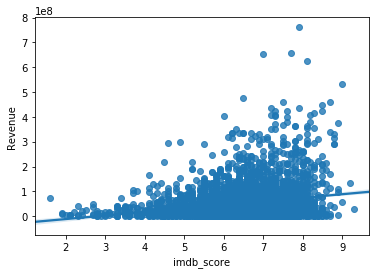

In [18]:
#Scatter plot of budget and revenue, shows better correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="imdb_score", y="Revenue", data=movies_data_1);

#### Bar Graph - Bar garphs are the best way to show the comaprison. By looking at the below bar graph qickly tell the what is he hightest number of count for content rating.

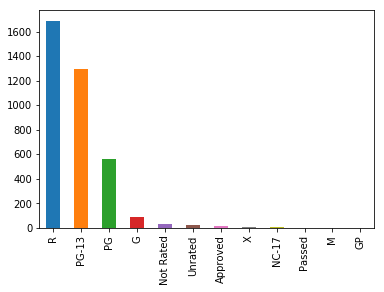

In [19]:
# Count fo movies by Content Rating
movies_data_1['content_rating'].value_counts().plot(kind="bar")

#### Histrogram - A histogram is a graphical representation of a frequency distribution. This type of visulas can only shown to the Technical users or users who ahve knowldge of statistics. Below Histrogram showing the frquency of duration.

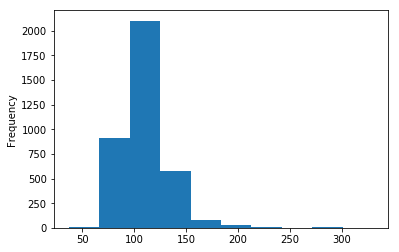

In [20]:
#This histogram tells us that most of the movies have the duration of 55–150 minutes
movies_data_1['duration'].plot(kind='hist', bins=10)

#### Boxplot - Boxplots are used to show the distribution of data base on median , first quartile , third quartile , maximum and help to idetify the outliers in the dataset. Below Boxplot consist positive as well as negative outliers. 

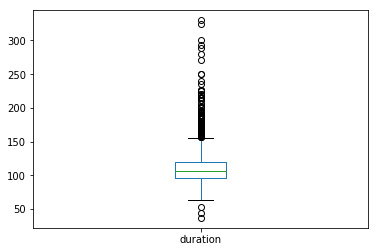

In [21]:
#Boxplot for the same data which is used above
movies_data_1['duration'].plot(kind='box')

#### Highest Revenue earned on 6.7 Imdb score

AxesSubplot(0.125,0.125;0.775x0.755)


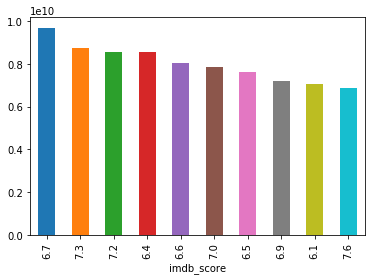

In [22]:
# Imdb_Score Vs Highest Revenue
x= movies_data_1.groupby(['imdb_score'])['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
print(x)

#### Maximum Movies are colour

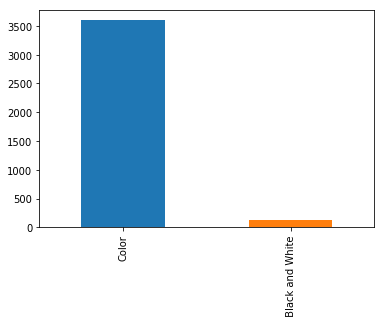

In [23]:
movies_data_1['color'].value_counts().plot(kind="bar")

#### Top 10 Movies based on Revenue

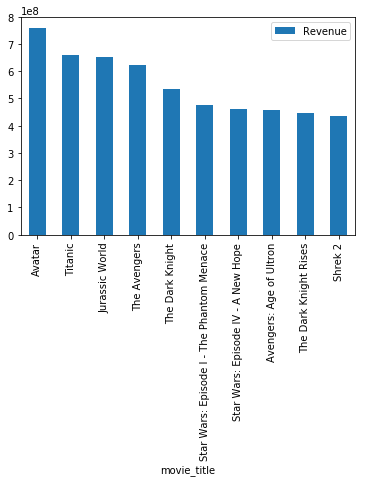

In [24]:
# Top 10 Movies by Revenue
movies_data_filtered=movies_data_1.drop(['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes','title_year'],axis=1)
movies_data_filtered.groupby('movie_title').mean().sort_values('Revenue',ascending=False)[:10].plot(kind='bar')

#### top 10 directors with highest Imdb score

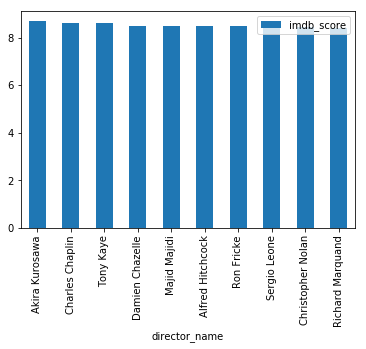

In [25]:
#Top 10 Directors with highest imdb score
movies_data_filtered=movies_data_1.drop(['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes','title_year','Revenue'],axis=1)
movies_data_filtered.groupby('director_name').mean().sort_values('imdb_score',ascending=False)[:10].plot(kind='bar')

#### Line Visuals - Line visulas used when we have data over time so we can show the trend. By looking at below trend we can easily see the sudden drop for votes.

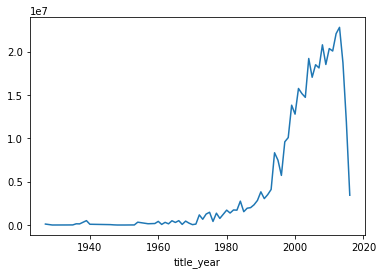

In [26]:
# number of votes dropped 
Votes= movies_data_1.groupby(['title_year'])['num_voted_users'].sum().plot(kind="line")

#### Seperated Genres column

In [27]:
#Genres Analysis
from pandas import Series, DataFrame
movie_data['genres']=movie_data['genres'].astype(str)

s = movie_data['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movie_data['genres']
movie_data.join(s)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Adventure
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Fantasy
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Sci-Fi
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Fantasy
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Thriller


### Genres Wise Movie Count and Language

##### Visual 1-  most of teh movies are released in English language.
##### Visual 2-  Drama , Comedy and Horror genre has maximum number of count

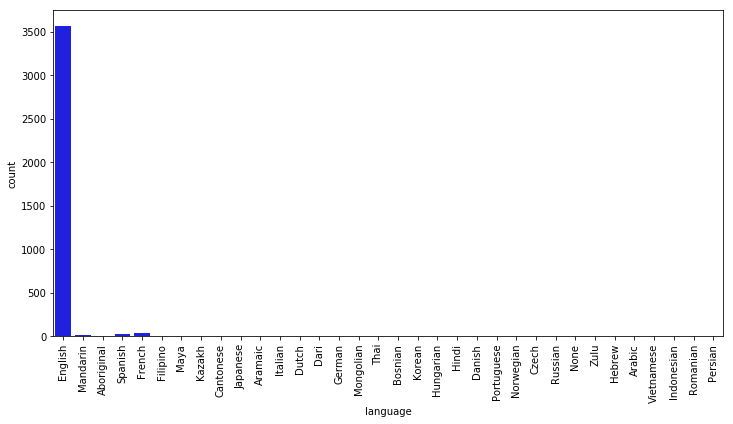

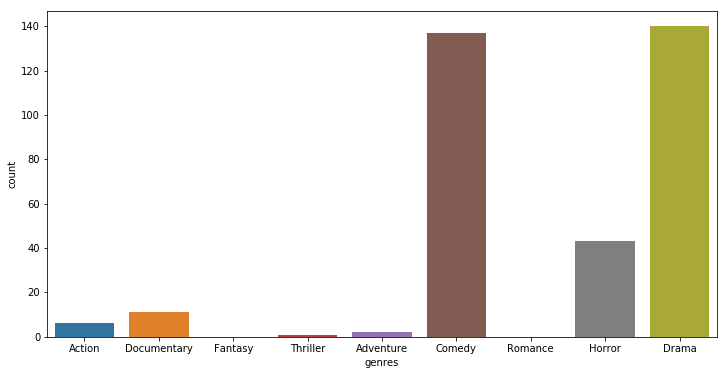

In [28]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'language', data = movies_data_1,color='blue')
xt = plt.xticks(rotation=90)
 
plt.figure(figsize = (12, 6))
sns.countplot(x='genres', data=movies_data_1, order=['Action', 'Documentary','Fantasy','Thriller','Adventure','Comedy','Romance','Horror','Drama'])

#### Depicting Imdb score for critics review

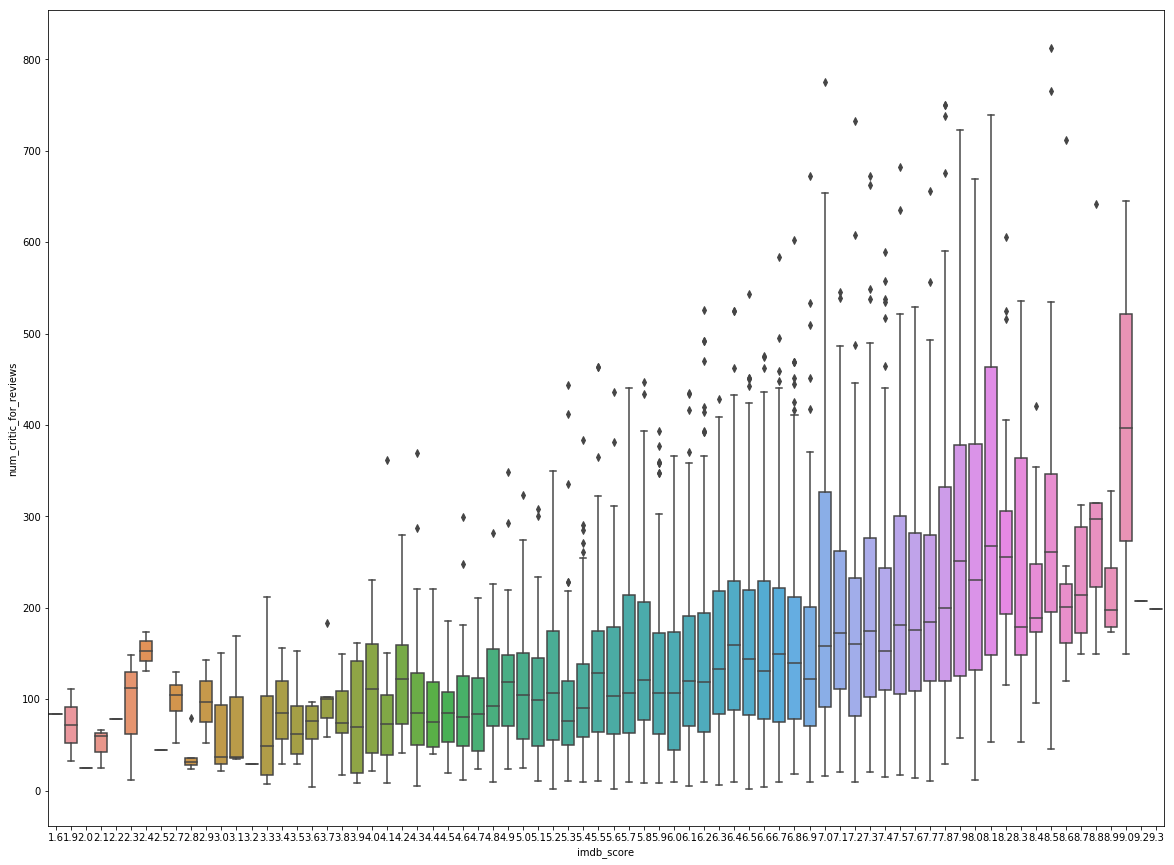

In [29]:
f, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x = 'imdb_score' , y = 'num_critic_for_reviews',  data = movies_data_1)

### Machine Learning Models

In [30]:
# MAchine Learning Models

data1=movie_data
feature_cols=['cast_total_facebook_likes','director_facebook_likes','actor_1_facebook_likes','movie_facebook_likes','facenumber_in_poster','title_year','duration','num_critic_for_reviews','num_user_for_reviews','num_voted_users','imdb_score']
data1=data1[feature_cols]
data1.head()

,cast_total_facebook_likes,director_facebook_likes,actor_1_facebook_likes,movie_facebook_likes,facenumber_in_poster,title_year,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,813.0,2701.0,1144337,8.5
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,462.0,738.0,212204,6.6


In [31]:
data1=data1.dropna()
data1.describe().round(1)

,cast_total_facebook_likes,director_facebook_likes,actor_1_facebook_likes,movie_facebook_likes,facenumber_in_poster,title_year,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score
count,3756.0,3756.0,3756.0,3756.0,3756.0,3756.0,3756.0,3756.0,3756.0,3756.0,3756.0
mean,11527.1,807.3,7751.3,9353.8,1.4,2003.0,110.3,167.4,336.8,105826.7,6.5
std,19122.2,3068.2,15519.3,21462.9,2.0,9.9,22.6,123.5,411.2,152035.4,1.1
min,0.0,0.0,0.0,0.0,0.0,1927.0,37.0,2.0,4.0,91.0,1.6
25%,1919.8,11.0,745.0,0.0,0.0,1999.0,96.0,77.0,110.0,19667.0,5.9
50%,4059.5,64.0,1000.0,227.0,1.0,2004.0,106.0,138.5,210.0,53973.5,6.6
75%,16240.0,235.0,13000.0,11000.0,2.0,2010.0,120.0,224.0,398.2,128602.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,813.0,5060.0,1689764.0,9.3


In [32]:
data1.corr().round(3)

,cast_total_facebook_likes,director_facebook_likes,actor_1_facebook_likes,movie_facebook_likes,facenumber_in_poster,title_year,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score
cast_total_facebook_likes,1.000,0.119,0.945,0.206,0.081,0.127,0.120,0.237,0.179,0.249,0.107
director_facebook_likes,0.119,1.000,0.090,0.162,-0.048,-0.045,0.181,0.175,0.217,0.300,0.192
actor_1_facebook_likes,0.945,0.090,1.000,0.130,0.057,0.096,0.084,0.166,0.122,0.180,0.094
movie_facebook_likes,0.206,0.162,0.130,1.000,0.015,0.307,0.215,0.705,0.370,0.518,0.281
facenumber_in_poster,0.081,-0.048,0.057,0.015,1.000,0.070,0.027,-0.034,-0.081,-0.032,-0.065
title_year,0.127,-0.045,0.096,0.307,0.070,1.000,-0.130,0.420,0.019,0.024,-0.135
duration,0.120,0.181,0.084,0.215,0.027,-0.130,1.000,0.229,0.352,0.340,0.366
num_critic_for_reviews,0.237,0.175,0.166,0.705,-0.034,0.420,0.229,1.000,0.564,0.592,0.348
num_user_for_reviews,0.179,0.217,0.122,0.370,-0.081,0.019,0.352,0.564,1.000,0.779,0.325
num_voted_users,0.249,0.300,0.180,0.518,-0.032,0.024,0.340,0.592,0.779,1.000,0.482


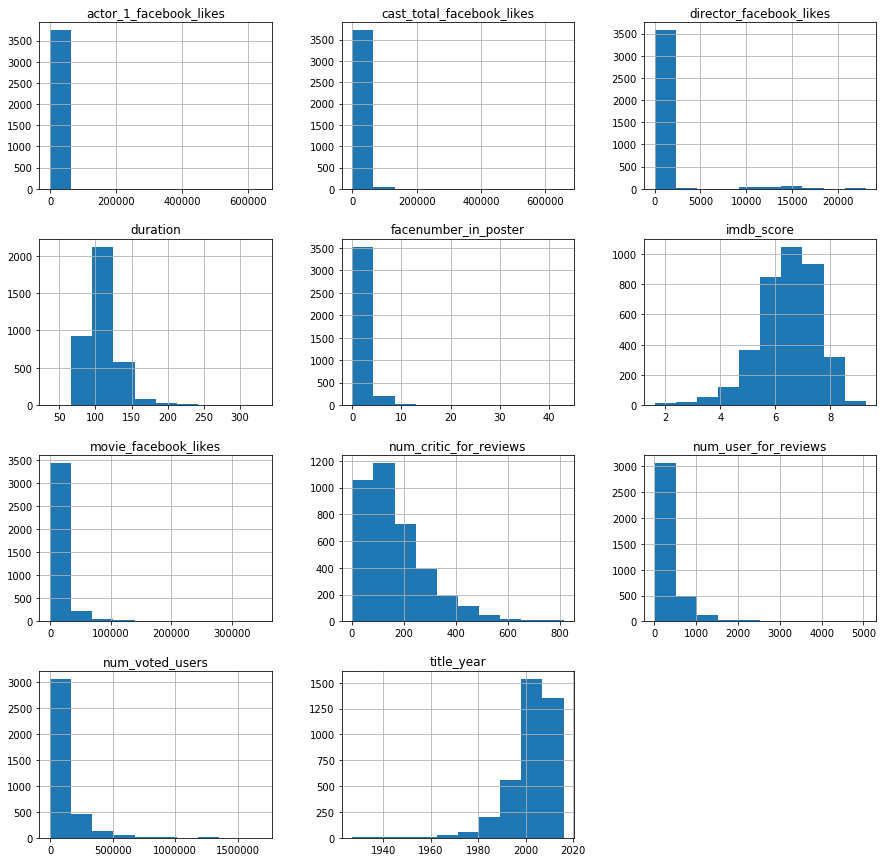

In [34]:
#Variables have roughly the same scale and unit, hence the need for Pre-Processing is eliminated
pd.DataFrame.hist(data1, figsize = [15,15]);

In [36]:
x=data1.drop(['imdb_score','movie_facebook_likes','num_voted_users','num_critic_for_reviews','director_facebook_likes'], axis=1)
y=data1.imdb_score

#### Data Split 80% 20% Train & Test

In [41]:
#Splitting data into Training and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)

(3004, 10)
(3004,)
(752, 10)
(752,)


### KNN CLASSIFIER

In [42]:
#Run KNN CLassifier Model
#Binning 'Ratings' variable into groups

h=data1
bins=[0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
h['categories']=pd.cut(h.imdb_score,bins,labels=groups)

x=h.drop(['imdb_score','categories'], axis=1)
y=h.categories

#### CROSS VALIDATION KNN

Maximum Accuracy for KNN: 0.784574


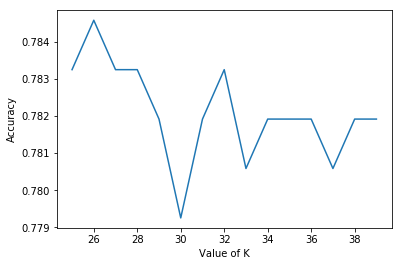

In [43]:
#Cross Validating model performance for range of 'K' neighbours
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range=range(25,40)
k_scores=[]

for k in k_range:
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

k_scores=pd.DataFrame(k_scores)
print('Maximum Accuracy for KNN: %f'%k_scores.max())

### DECISION TREE

In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

             precision    recall  f1-score   support

          A       0.49      0.52      0.50       114
          B       0.82      0.82      0.82       568
          C       0.27      0.25      0.26        63
          D       0.14      0.14      0.14         7

avg / total       0.72      0.72      0.72       752

[[ 59  52   3   0]
 [ 59 465  38   6]
 [  2  45  16   0]
 [  0   4   2   1]]
Accuracy of prediction: 0.697


### RANDOM FOREST

In [45]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
cr = classification_report(y_test,predictions)
print(cr)
cm = confusion_matrix(y_test,rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


             precision    recall  f1-score   support

          A       0.49      0.52      0.50       114
          B       0.82      0.82      0.82       568
          C       0.27      0.25      0.26        63
          D       0.14      0.14      0.14         7

avg / total       0.72      0.72      0.72       752

[[ 50  64   0   0]
 [ 17 551   0   0]
 [  0  58   5   0]
 [  0   7   0   0]]
Accuracy of prediction: 0.799


### Random forest is giving higest accuracy and performing well with this dataset